In [1]:
import os; 
import healpy as hp; import numpy as np; 
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:100% !important; }</style>"))
%pylab inline
%load_ext autoreload
%autoreload 2

/Users/tomek/python-venv/anaconda-2.4/anaconda/lib/python2.7/pkgutil.py:186: ImportWarning: Not importing directory '/Users/tomek/python-venv/anaconda-2.4/anaconda/lib/python2.7/site-packages/google': missing __init__.py
  file, filename, etc = imp.find_module(subname, path)


Populating the interactive namespace from numpy and matplotlib


In [239]:
def make_zoom(map_test1, cmap=cm.gray_r, title='', rot = (0,45,-20), dtheta=5, clim = [-0.025, 0.041]):
    edge_arcmin = 2*dtheta*60
    n_pix = 500
    reso = edge_arcmin/float(n_pix)
    hp.gnomview(map_test1, reso=reso, xsize=n_pix, notext=True, title=title, rot=(0,0,0), cmap=cmap, min=clim[0], max=clim[1], hold=True)
    hp.graticule();


In [165]:
hp.projplot?

In [167]:
def make_ball(map_test1, cmap=cm.gray_r, clim=None, title='', rot = (0,45,-20), dtheta = 5):
    cmap.set_over('w')
    cmap.set_under('w')
    cmap.set_bad('lightgrey')
    dot_size=10
    if clim==None:
        hp.visufunc.orthview(map=map_test1, half_sky=True, title=title, rot=rot, cmap=cmap, cbar=True, hold=True, nest=False, notext=True);
    else:
        hp.visufunc.orthview(map=map_test1, half_sky=True, title=title, rot=rot, cmap=cmap, cbar=True, hold=True, nest=False, notext=True, min=clim[0], max=clim[1]);
    theta, phi = hp.pix2ang(hp.npix2nside(len(map_test1)), range(len(map_test1)), nest=True);
#     hp.projscatter(theta, phi, c='k', s=dot_size);
    
    hp.graticule();
    hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,180-rot[2]), local=True);
    hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,-1*rot[2]), local=True);
        
    lw=2
    
    theta = np.linspace(90-dtheta, 90+dtheta, 100)*np.pi/180.
    phi = np.linspace(-dtheta, -dtheta, 100)*np.pi/180.
    hp.projplot(theta, phi, c='k', lw=lw);

    theta = np.linspace(90-dtheta, 90+dtheta, 100)*np.pi/180.
    phi = np.linspace(dtheta, dtheta, 100)*np.pi/180.
    hp.projplot(theta, phi, c='k', lw=lw);

    theta = np.linspace(90-dtheta, 90-dtheta, 100)*np.pi/180.
    phi = np.linspace(-dtheta, dtheta, 100)*np.pi/180.
    hp.projplot(theta, phi, c='k', lw=lw);

    theta = np.linspace(90+dtheta, 90+dtheta, 100)*np.pi/180.
    phi = np.linspace(-dtheta, dtheta, 100)*np.pi/180.
    hp.projplot(theta, phi, c='k', lw=lw);

In [4]:
map_kappa1 = np.load('./data_v6/kappa_omega_m_0p31_s_1.npy')
map_kappa1 -= np.mean(map_kappa1)
map_kappa2 = np.load('./data_v6/kappa_omega_m_0p26_s_1.npy')
map_kappa2 -= np.mean(map_kappa2)

In [108]:
sigma_hires, sigma_lores = 5, 60

In [109]:
map_kappa1_lores = hp.ud_grade(map_kappa1, nside_out=512)
sigma_rad = sigma_lores / 60. * np.pi / 180.
map_kappa1_lores = hp.smoothing(map_kappa1_lores, fwhm=sigma_rad)

map_kappa1_hires = hp.ud_grade(map_kappa1, nside_out=1024)
sigma_rad = sigma_hires / 60. * np.pi / 180.
map_kappa1_hires = hp.smoothing(map_kappa1_hires, fwhm=sigma_rad)

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 2.123305 arcmin (0.000618 rad) 
-> fwhm is 5.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [110]:
map_kappa2_lores = hp.ud_grade(map_kappa2, nside_out=512)
sigma_rad = sigma_lores / 60. * np.pi / 180.
map_kappa2_lores = hp.smoothing(map_kappa1_lores, fwhm=sigma_rad)

map_kappa2_hires = hp.ud_grade(map_kappa2, nside_out=1024)
sigma_rad = sigma_hires / 60. * np.pi / 180.
map_kappa2_hires = hp.smoothing(map_kappa2_hires, fwhm=sigma_rad)

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 2.123305 arcmin (0.000618 rad) 
-> fwhm is 5.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [236]:
map_kappa1_hires.min(), map_kappa1_hires.max()

(-0.032120882363539209, 0.17873871785895951)

In [237]:
map_kappa2_hires.min(), map_kappa2_hires.max()

(-0.032177082633458497, 0.22185910464774941)

In [246]:
clim = [-0.014, 0.029]
clim_hires = [-0.03, 0.04]
rot = (0,-20,-20) 
dtheta = 5

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
saved figure_kappa_diff.part1.svg
82.978437542 97.021562458 -7.02156245801 7.02156245801
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
saved figure_kappa_diff.part2.svg
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
saved figure_kappa_diff.part3.svg
82.978437542 97.0215624

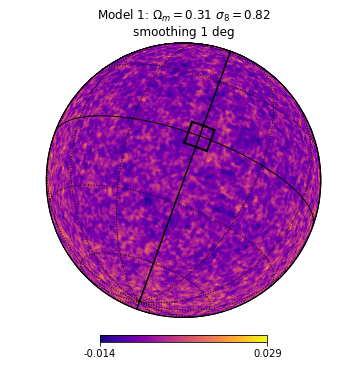

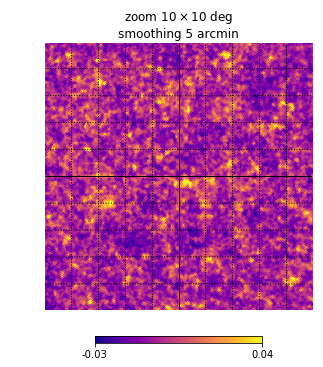

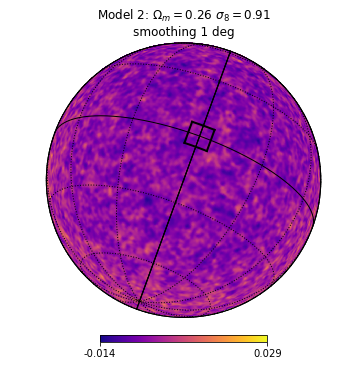

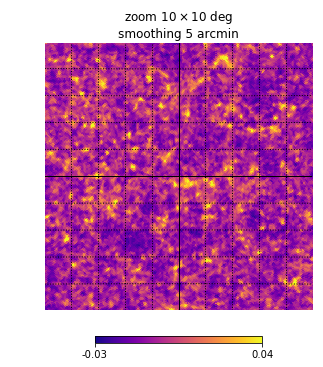

In [253]:
nx, ny, fs = 2, 2, 3
pl.figure(figsize=(nx*fs, ny*fs))
make_ball(map_kappa1_lores, cmap=pl.cm.plasma, clim=clim, rot=rot, dtheta=dtheta, title=r'Model 1: $\Omega_m=0.31$ $\sigma_8=0.82$' + '\nsmoothing 1 deg')
filename_plot = os.path.join('figure_kappa_diff.part1.svg')
pl.savefig(filename_plot, bbox_inches='tight', transparent=True); print('saved {}'.format(filename_plot))

pl.figure(figsize=(nx*fs, ny*fs))
make_zoom(map_kappa1_hires, cmap=cm.plasma, clim=clim_hires, rot = rot, dtheta=dtheta, title=r'zoom $10 \times 10$ deg'+'\nsmoothing 5 arcmin')
filename_plot = os.path.join('figure_kappa_diff.part2.svg')
pl.savefig(filename_plot, bbox_inches='tight', transparent=True); print('saved {}'.format(filename_plot))

pl.figure(figsize=(nx*fs, ny*fs))
make_ball(map_kappa2_lores, cmap=pl.cm.plasma, clim=clim, rot=rot, dtheta=dtheta, title=r'Model 2: $\Omega_m=0.26$ $\sigma_8=0.91$' + '\nsmoothing 1 deg')
filename_plot = os.path.join('figure_kappa_diff.part3.svg')
pl.savefig(filename_plot, bbox_inches='tight', transparent=True); print('saved {}'.format(filename_plot))

pl.figure(figsize=(nx*fs, ny*fs))
make_zoom(map_kappa2_hires, cmap=cm.plasma, clim=clim_hires, rot = rot, dtheta=dtheta, title=r'zoom $10 \times 10$ deg'+'\nsmoothing 5 arcmin')
filename_plot = os.path.join('figure_kappa_diff.part4.svg')
pl.savefig(filename_plot, bbox_inches='tight', transparent=True); print('saved {}'.format(filename_plot))


In [254]:
import svgutils.compose as sc
from IPython.display import SVG # /!\ note the 'SVG' function also in svgutils.compose

In [255]:
lw=2

In [256]:
svg_fig = sc.Figure("20cm", "10cm",  
                    sc.SVG("figure_kappa_diff.part1.svg").scale(1).move(0,   0),
                    sc.SVG("figure_kappa_diff.part2.svg").scale(1).move(350, 0),
                    sc.Line( ((191,116), (390, 40)), width=lw, color='black'),
                    sc.Line( ((206,144), (390, 300)), width=lw, color='black')
                   )
svg_fig.save("figure_kappa_diff_model1.svg")
SVG('figure_kappa_diff_model1.svg')


In [257]:
svg_fig = sc.Figure("20cm", "10cm",  
                    sc.SVG("figure_kappa_diff.part3.svg").scale(1).move(0,   0),
                    sc.SVG("figure_kappa_diff.part4.svg").scale(1).move(350, 0),
                    sc.Line( ((191,116), (390, 40)), width=lw, color='black'),
                    sc.Line( ((206,144), (390, 300)), width=lw, color='black')
                   )
svg_fig.save("figure_kappa_diff_model2.svg")
SVG('figure_kappa_diff_model2.svg')